
File Name : CrimeDataAnalysis_Part_2.ipynb

Author : S.Srihari

Date : 12-18-18



In [47]:
import os
import pandas as pd
import webbrowser
import numpy as np

import seaborn as sns
sns.set()
%matplotlib inline
from DataExtractor import DataExtractor
from DataUtils import *
from VizTools import *


In [3]:
# Set the path variables
_path = os.path.join(os.getcwd(), "datasets/crime")

db = 'crime_data'

start_year = 2001
end_year = 2017
all_year_data = []

columns_to_select = ["Arrest", 
                     "Date", 
                     "Year", 
                     "crime_count", 
                     "day", 
                     "month", 
                     "`Primary Type`"
                     ]

for year in range(start_year, end_year+1):
    # print("Pulling year:", year)
    cols = ''.join(s+", " for s in columns_to_select)
    query = "SELECT " + cols[:-2] + " FROM crime_" + str(year) + " LIMIT 1000;"
    # print(query)
    data_extractor = DataExtractor()
    year_df = data_extractor.read_db(db=db, query=query)
    print("Pulled", year_df.shape[0], "rows of data for year", year)
    # print(year_df.shape)
    all_year_data.append(year_df)

Pulled 1000 rows of data for year 2001
Pulled 1000 rows of data for year 2002


Pulled 1000 rows of data for year 2003
Pulled 1000 rows of data for year 2004


Pulled 1000 rows of data for year 2005
Pulled 1000 rows of data for year 2006


Pulled 1000 rows of data for year 2007
Pulled 1000 rows of data for year 2008


Pulled 1000 rows of data for year 2009
Pulled 1000 rows of data for year 2010


Pulled 1000 rows of data for year 2011
Pulled 1000 rows of data for year 2012


Pulled 1000 rows of data for year 2013
Pulled 1000 rows of data for year 2014


Pulled 1000 rows of data for year 2015
Pulled 1000 rows of data for year 2016


Pulled 1000 rows of data for year 2017


In [3]:

print_columns(all_year_data[0])


Dataframe columns :
	 Arrest	 Date	 Year	 crime_count	 day	 month	 Primary Type

Use the pareto principle to decide which crimes contribute towards 20% of all distribtions

In [4]:
crime_df = pd.DataFrame(columns=["Primary Type", "Count", "Year"])
for year_data in all_year_data:
    crime_groups = year_data["Primary Type"].value_counts()
    crime_groups = pd.DataFrame(crime_groups).reset_index()
    crime_groups["Year"] = year_data["Year"].unique()[0]
    crime_groups.columns = ["Primary Type", "Count", "Year"]
    crime_df = crime_df.append(crime_groups, ignore_index=True)

In [7]:
crime_df.head()

,Primary Type,Count,Year
0,THEFT,225,2001
1,BATTERY,176,2001
2,CRIMINAL DAMAGE,153,2001
3,OTHER OFFENSE,99,2001
4,DECEPTIVE PRACTICE,64,2001


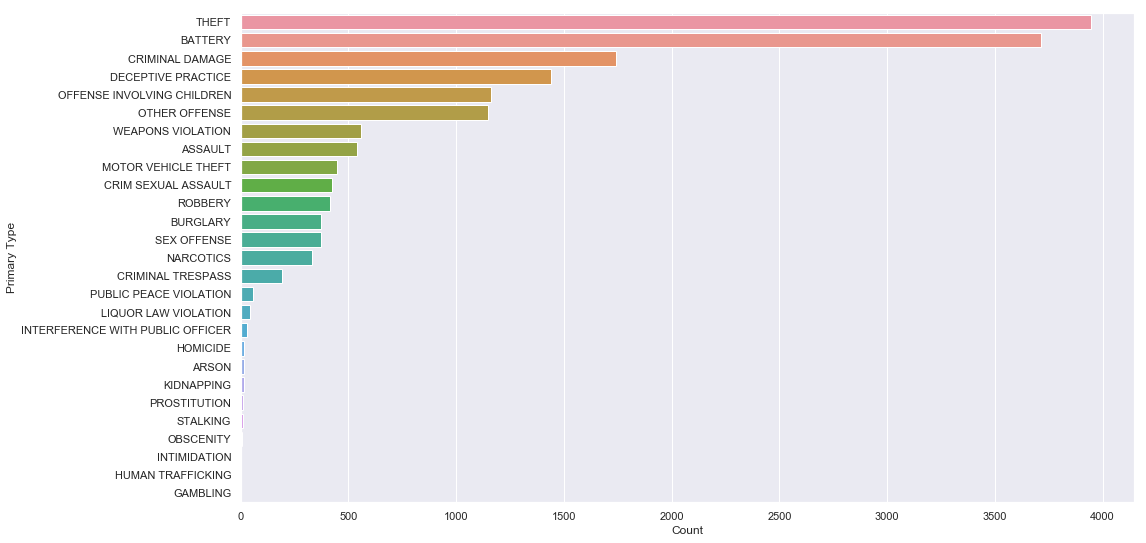

In [85]:
crime_levels = crime_df[["Primary Type", "Count"]].groupby(by="Primary Type", as_index=False).sum()
crime_levels.sort_values(by="Count", inplace=True, ascending=False)
crime_levels.reset_index(drop=True, inplace=True)
plt.figure(figsize=(16, 9))
sns.barplot(x="Count", y="Primary Type", data=crime_levels)


In [6]:
# Crimes to monitor
crime_levels.head()
crime_levels["Count_cdf"] = crime_levels["Count"].cumsum() / crime_levels["Count"].sum()
crime_levels

,Primary Type,Count,Count_cdf
0,THEFT,3946,0.232118
1,BATTERY,3712,0.450471
2,CRIMINAL DAMAGE,1741,0.552882
3,DECEPTIVE PRACTICE,1442,0.637706
4,OFFENSE INVOLVING CHILDREN,1161,0.706000
5,OTHER OFFENSE,1147,0.773471
6,WEAPONS VIOLATION,559,0.806353
7,ASSAULT,542,0.838235
8,MOTOR VEHICLE THEFT,446,0.864471
9,CRIM SEXUAL ASSAULT,423,0.889353


In [79]:
# Find the cdf value that is closest to the cut off value
cut_off_cdf = 0.8
idx = crime_levels.loc[(crime_levels['Count_cdf']-cut_off_cdf).abs() ==
                       (crime_levels['Count_cdf']-cut_off_cdf).abs().min()].index.values[0]

crime_groups_subset = crime_levels.iloc[:idx+1, :]
crime_groups_subset

,Primary Type,Count,Count_cdf
0,THEFT,3946,0.232118
1,BATTERY,3712,0.450471
2,CRIMINAL DAMAGE,1741,0.552882
3,DECEPTIVE PRACTICE,1442,0.637706
4,OFFENSE INVOLVING CHILDREN,1161,0.706000
5,OTHER OFFENSE,1147,0.773471
6,WEAPONS VIOLATION,559,0.806353


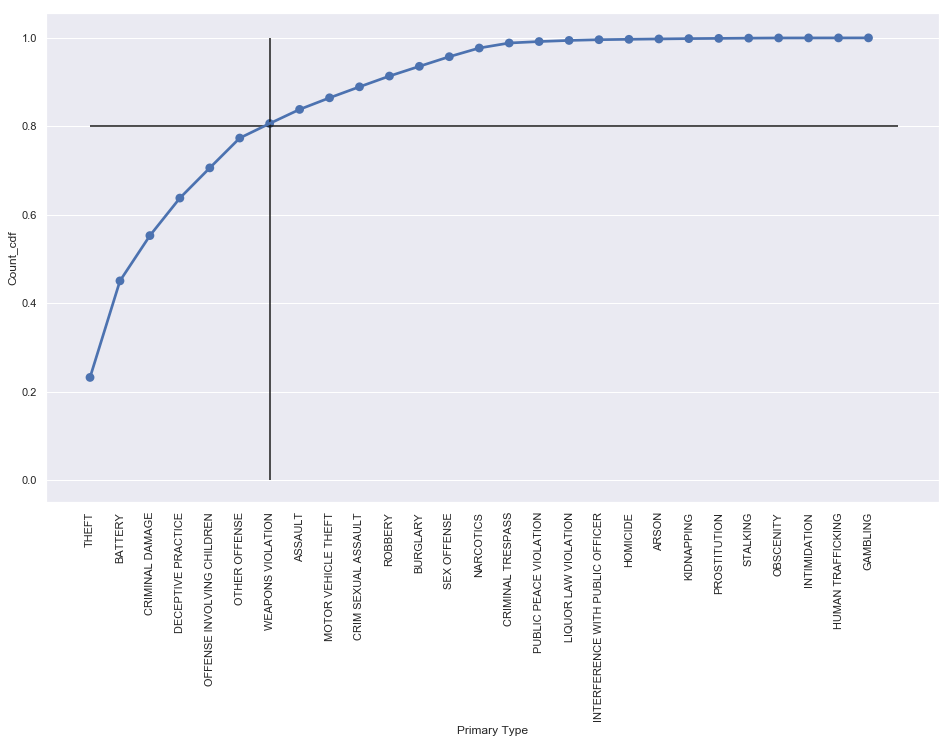

In [81]:
plt.figure(figsize=(16, 9))
g = sns.pointplot(y="Count_cdf", x="Primary Type", data=crime_levels, sort=False).\
    set_xticklabels(rotation=90, labels=crime_levels["Primary Type"])
plt.hlines(y=cut_off_cdf, xmin=0, xmax=len(crime_levels["Primary Type"].unique()))
plt.vlines(x=idx, ymin=0, ymax=1)

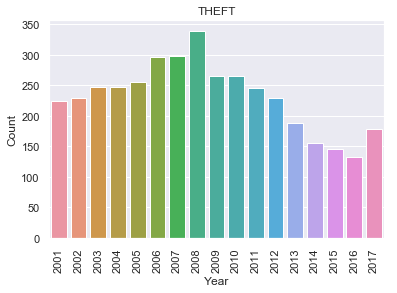

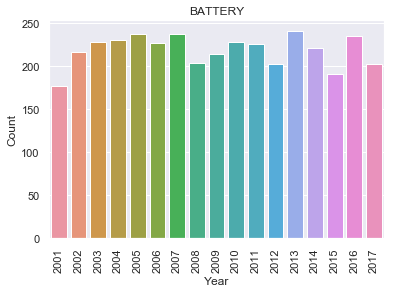

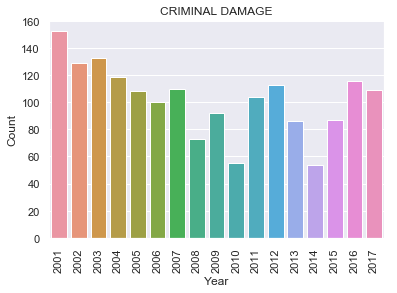

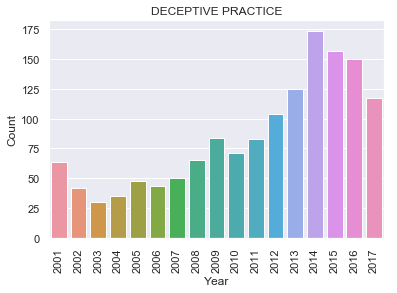

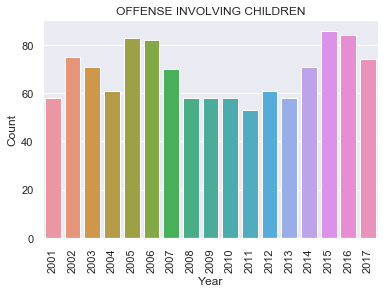

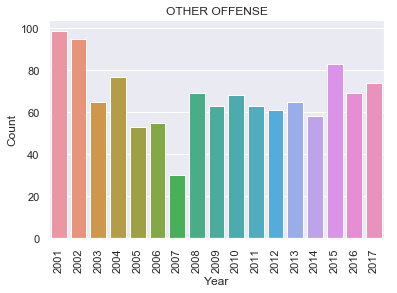

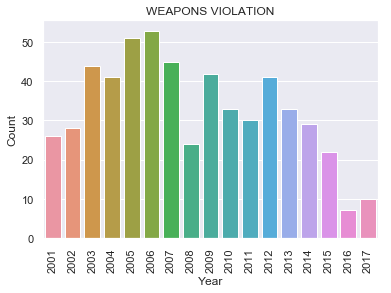

In [83]:
# Let's analyse what this crime subset can tell us
most_occuring_crimes = list(crime_groups_subset["Primary Type"].unique())
common_crime_df = crime_df[crime_df["Primary Type"].isin(most_occuring_crimes)]

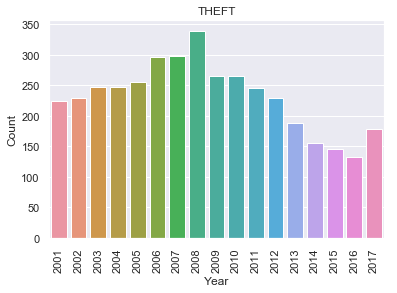

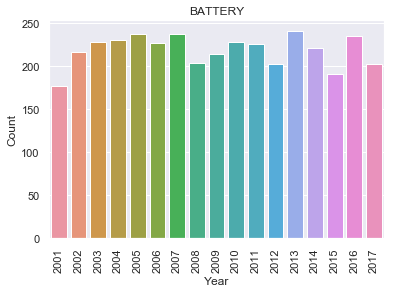

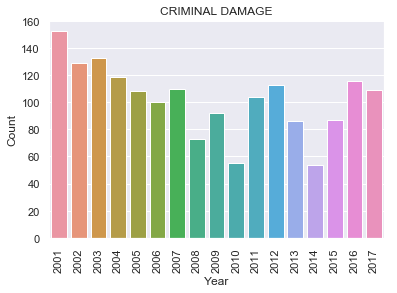

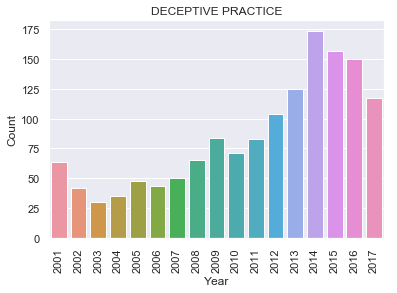

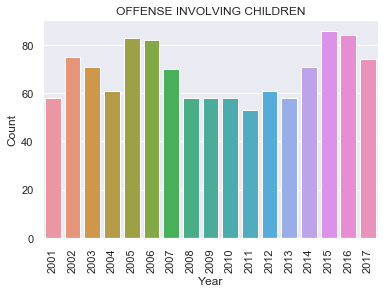

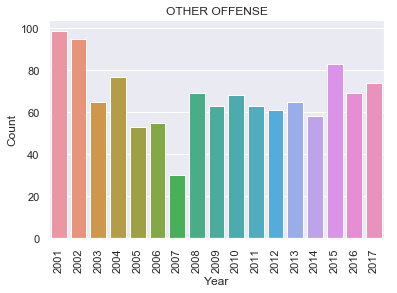

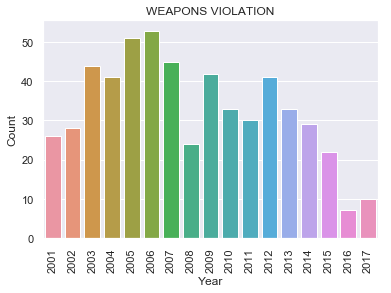

In [84]:
for i in range(0, len(most_occuring_crimes)):
    temp_df = common_crime_df[common_crime_df["Primary Type"]==most_occuring_crimes[i]]
    sns.barplot(x="Year", y="Count",
                data=temp_df).\
    set_xticklabels(rotation=90, labels=temp_df["Year"])
    plt.title(most_occuring_crimes[i])
    plt.show()